## Observations and Insights 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pylab

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
num_mice = len(mouse_df['Mouse ID'].unique())
num_mice

249

In [6]:
# Find any duplicate mouse IDs (where Mouse ID and Timepoint repeat) 
# and remove them from the data set. 
clean_mouse_df = mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint' ])

In [34]:
clean_mouse_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [8]:
# Use regimen as index to create a statistical table. 
drug_regimen_df = clean_mouse_df.groupby('Drug Regimen')

# Cast mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

mean_regimen = drug_regimen_df['Tumor Volume (mm3)'].mean()
median_regimen = drug_regimen_df['Tumor Volume (mm3)'].median()
var_regimen = drug_regimen_df['Tumor Volume (mm3)'].var()
std_regimen = drug_regimen_df['Tumor Volume (mm3)'].std()
sem_regimen = drug_regimen_df['Tumor Volume (mm3)'].sem()


In [9]:
# Use statistical data compiled and create a Summary Statistical Table
summary_stats_regimen = pd.DataFrame({
    'Mean': mean_regimen,
    'Median': median_regimen,
    'Variance': var_regimen,
    'Standard Deviation': std_regimen,
    'SEM': sem_regimen
})
summary_stats_regimen.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [10]:
# Find how many times each regiment was used. 
regimen_count = clean_mouse_df["Drug Regimen"].value_counts()
bar_df = pd.DataFrame({
    'Count': regimen_count,
    'Drug Regimen': ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
    })
bar_df

,Count,Drug Regimen
Capomulin,230,Capomulin
Ramicane,228,Ramicane
Ketapril,188,Ketapril
Naftisol,186,Naftisol
Zoniferol,182,Zoniferol
Stelasyn,181,Stelasyn
Placebo,181,Placebo
Ceftamin,178,Infubinol
Infubinol,178,Ceftamin
Propriva,156,Propriva


Text(0, 0.5, 'Measuments')

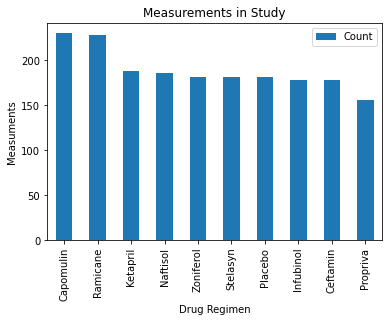

In [30]:
# Create bar plot that shows the total number of measurements taken for each treatment regimen 
#throughout the course of the study

# Plot using DataFrame.plot() to confirm pyplot information. 
bar_df.plot(x="Drug Regimen", y="Count", kind="bar", title="Measurements in Study")
plt.ylabel("Measuments")

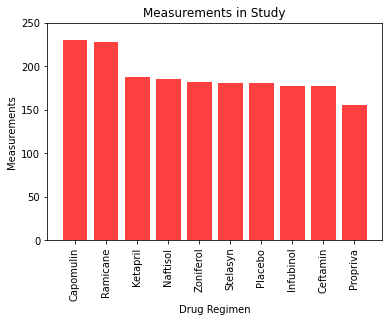

In [32]:
# Create bar plot that shows the total number of measurements taken for each treatment regimen 
#throughout the course of the study

# Plot using pyplot

x_value = bar_df["Drug Regimen"]
y_value = bar_df["Count"]
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")
plt.title("Measurements in Study")
plt.ylim(0, max(bar_df["Count"])+ 20)
plt.bar(x_value, y_value, facecolor="red", alpha=0.75)
plt.xticks(rotation=90)
plt.show()

In [86]:
# Find the number of Male and Female mice
sex_count = clean_mouse_df["Sex"].value_counts()
sex_count_df = pd.DataFrame(sex_count)
sex_count_df

,Sex
Male,958
Female,930


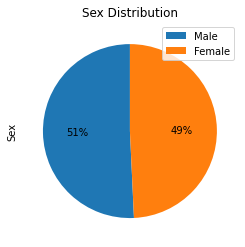

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count_df.plot(kind="pie", y='Sex', use_index=False, title="Sex Distribution", autopct='%1.0f%%', labels=None, startangle=90)



C:\Users\monte\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


([<matplotlib.patches.Wedge at 0x1c558ae6128>,
 [Text(-1.0997015355311284, -0.025622895044835673, 'Male'),
  Text(1.099701537930112, 0.02562279208334746, 'Female')],
 [Text(-0.5998372011987972, -0.013976124569910365, '50.7%'),
  Text(0.5998372025073339, 0.013976068409098612, '49.3%')])

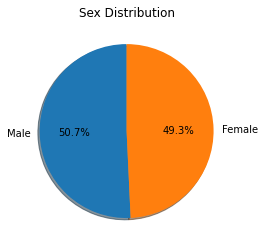

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ['Male', 'Female']
plt.title("Sex Distribution")
plt.pie(sex_count_df, shadow=True, labels=labels, explode=None, autopct='%1.1f%%', startangle=90)


In [107]:
final_volume = drug_regimen_df['Tumor Volume (mm3)'].sum()
final_volume

Drug Regimen
Capomulin     9355.420462
Ceftamin      9361.228582
Infubinol     9413.493529
Ketapril     10384.299876
Naftisol     10105.671026
Placebo       9780.078122
Propriva      8173.380288
Ramicane      9169.417875
Stelasyn      9816.199991
Zoniferol     9689.044192
Name: Tumor Volume (mm3), dtype: float64

In [108]:
final_volume_df = pd.DataFrame(final_volume)
final_volume_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,9355.420462
Ceftamin,9361.228582
Infubinol,9413.493529
Ketapril,10384.299876
Naftisol,10105.671026
Placebo,9780.078122
Propriva,8173.380288
Ramicane,9169.417875
Stelasyn,9816.199991


In [110]:
promising_df = final_volume_df.drop(['Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'])
promising_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,9355.420462
Ceftamin,9361.228582
Infubinol,9413.493529
Ramicane,9169.417875


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
